In [1]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from math import pi

## Label

In [23]:
#Dataset Label Encoder
df_label = pd.read_csv('CleanDataLabelAndOneHot.csv')
df_label.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,0,1,0,0,0,1,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,0,1,0,0,1,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,0,1,0,1,0,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,0,1,0,1,0,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,0,1,0,0,1,0,0,0,1,0


In [24]:
#Feature Selection
obese_level = df_label['NObeyesdad']    
df_label = df_label.drop(columns=['NObeyesdad'])
# df_label = df_label.drop(columns=['NObeyesdad', "Height", "Weight", "CALC", "SMOKE","Age","SCC"])

# scaled, k=2, hasilnya 0.53
df_label_cluster = df_label[['Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'FAF', 'CAEC_Frequently',]]

# df_label_cluster = df_label[['Weight', 'Height', 'family_history_with_overweight', 'FAVC', 'CAEC_Sometimes', 'CAEC_no', 'FAF', 'CAEC_Frequently', 'NCP', 'SMOKE', 'SCC']]

#Data Standardization
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_label_cluster)

K=1, Inertia=1334.6508854877807
K=2, Inertia=863.8020159017967
K=3, Inertia=655.4331951795064
K=4, Inertia=531.8854714603366
K=5, Inertia=448.1417802806819
K=6, Inertia=376.22217919171294
K=7, Inertia=325.37708101162036
K=8, Inertia=291.62574124115633
K=9, Inertia=262.6429956331241


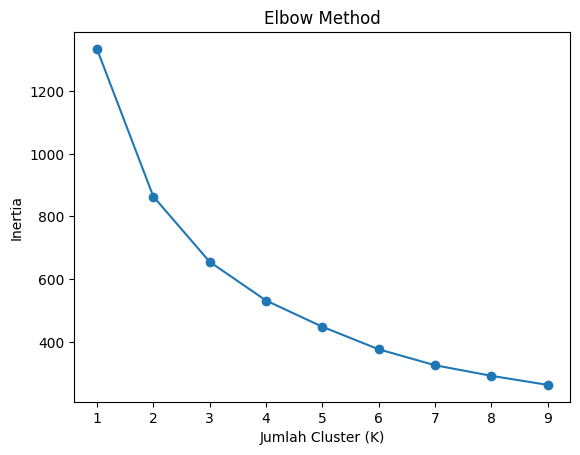

In [25]:
#Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    print(f'K={k}, Inertia={kmeans.inertia_}')
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [26]:
K = 3# Tentukan jumlah cluster berdasarkan Elbow Method
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
kmeans.fit(df_scaled)
labels = kmeans.labels_
df_label["Cluster"] = labels
# df_label['NObeyesdad'] = obese_level
df_label.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,CH2O,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster
0,0,21.0,1.62,64.0,1,0,2.0,3.0,0,2.0,...,1,0,0,0,1,0,0,1,0,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,3.0,...,1,0,0,1,0,0,0,1,0,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,0,2.0,...,1,0,1,0,0,0,0,1,0,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,0,2.0,...,1,0,1,0,0,0,0,0,1,0
4,1,22.0,1.78,89.8,0,0,2.0,1.0,0,2.0,...,1,0,0,1,0,0,0,1,0,0


In [8]:
# #Visualisasi Cluster
# df_analysis = df_label_cluster.copy() # Pakai fitur yang dipilih untuk clustering
# df_analysis['Cluster'] = labels

# # Hitung Rata-rata Perilaku per Klaster
# cluster_means = df_analysis.groupby('Cluster').mean()

# # Tampilkan Angkanya (Bisa dicopas ke laporan sebagai Tabel Centroid)
# print("=== Rata-rata Karakteristik Setiap Klaster ===")
# print(cluster_means)
# print("-" * 50)

# # --- BAGIAN 2: HEATMAP (Cek Dominasi) ---
# plt.figure(figsize=(10, 6))
# sns.heatmap(cluster_means.T, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
# plt.title('Heatmap Karakteristik Klaster (Semakin Biru = Semakin Tinggi Nilainya)')
# plt.show()

In [9]:
# scaler_radar = MinMaxScaler()
# df_radar_norm = pd.DataFrame(scaler_radar.fit_transform(cluster_means),
#                              columns=cluster_means.columns)
# df_radar_norm.reset_index(inplace=True) # Reset index biar ada kolom Cluster

# def create_radar_chart(df, categories, title):
#     N = len(categories)
#     angles = [n / float(N) * 2 * pi for n in range(N)]
#     angles += angles[:1]

#     fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

#     # Gambar satu per satu klaster
#     colors = ['b', 'r', 'g', 'c', 'm', 'y']
#     for i in range(len(df)):
#         values = df.loc[i].drop('index').values.flatten().tolist()
#         values += values[:1]
#         ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {i}', color=colors[i])
#         ax.fill(angles, values, color=colors[i], alpha=0.1)

#     ax.set_xticks(angles[:-1])
#     ax.set_xticklabels(categories)
#     plt.title(title, size=15, y=1.1)
#     plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
#     plt.show()

# # Panggil fungsi radar chart
# categories = list(df_analysis.columns.drop('Cluster'))
# create_radar_chart(df_radar_norm, categories, "Profil Gaya Hidup per Klaster")

In [27]:
#shilhouette score
score = silhouette_score(df_scaled, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.508979913793705


## OneHot Only

In [11]:
# DataSet
df_onehot = pd.read_csv('DataCleanOneHot.csv')
# df_onehot = df_onehot.drop(columns=['NObeyesdad', "Height", "Weight"])
# # Feature Selection
# df_onehot_cluster = df_onehot[["FAVC", "FCVC", "NCP" ,"CAEC_Frequently","CAEC_Sometimes","CAEC_no" ,"FAF" ,"TUE" , "MTRANS_Bike" ,"MTRANS_Motorbike",	"MTRANS_Public_Transportation",	"MTRANS_Walking"]]
# df_onehot.head()'
df_onehot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064 entries, 0 to 2063
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2064 non-null   float64
 1   Height                              2064 non-null   float64
 2   Weight                              2064 non-null   float64
 3   FCVC                                2064 non-null   float64
 4   NCP                                 2064 non-null   float64
 5   CH2O                                2064 non-null   float64
 6   FAF                                 2064 non-null   float64
 7   TUE                                 2064 non-null   float64
 8   NObeyesdad                          2064 non-null   object 
 9   Gender_Male                         2064 non-null   int64  
 10  SMOKE_yes                           2064 non-null   int64  
 11  FAVC_yes                            2064 no

In [12]:
df_onehot_cluster = df_onehot[["FAVC_yes", "FCVC", "NCP" ,"CAEC_Frequently","CAEC_Sometimes","CAEC_no" ,"FAF" ,"TUE" , "MTRANS_Bike" ,"MTRANS_Motorbike","MTRANS_Public_Transportation","MTRANS_Walking"]]
df_onehot.head()

#Data Standardization
scaler = MinMaxScaler()
df_scaled_onehot = scaler.fit_transform(df_onehot_cluster)

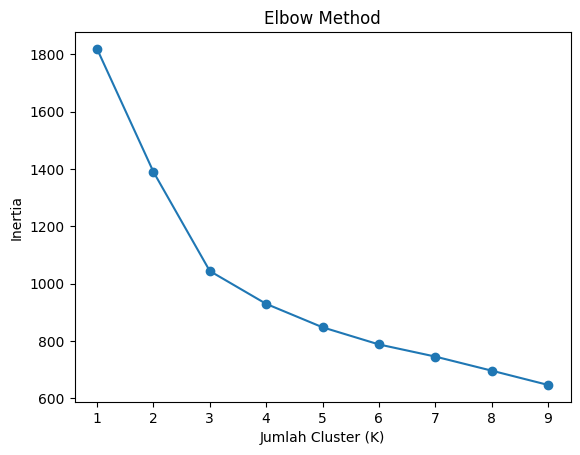

In [13]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_onehot)
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [14]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=20, algorithm='elkan', init='k-means++')
kmeans.fit(df_scaled_onehot)
labels_one = kmeans.labels_
df_onehot['Cluster'] = labels_one
df_onehot.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight_yes,Cluster
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,0,...,0,0,0,1,0,0,1,0,1,1
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,0,...,0,0,1,0,0,0,1,0,1,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,1,...,0,1,0,0,0,0,1,0,1,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,1,...,0,1,0,0,0,0,0,1,0,2
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,1,...,0,0,1,0,0,0,1,0,0,1


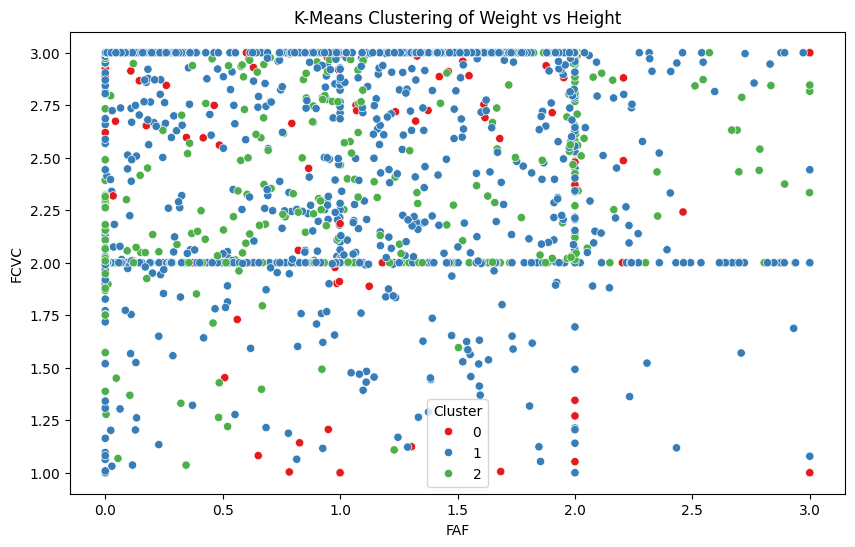

Silhouette Score: 0.3723339998961264


In [15]:
#Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_onehot, x='FAF', y='FCVC', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering of Weight vs Height')
plt.show()
#shilhouette score
score = silhouette_score(df_scaled_onehot, labels_one)
print(f'Silhouette Score: {score}')


## Combine

In [16]:
df_label = pd.read_csv('DataCleanLabel.csv')
df_onehot = pd.read_csv('DataCleanOneHot.csv')
feature_label = [["FAVC", "FCVC", "NCP" ,"FAF" ,"TUE"]]
feature_onehot = [["CAEC_Sometimes","CAEC_Frequently","CAEC_no" ,"MTRANS_Bike" ,"MTRANS_Motorbike","MTRANS_Public_Transportation","MTRANS_Walking"]]
display(df_label.head(5))
display(df_onehot.head(5))
df_combine_cluster = pd.DataFrame(
    {
        'FAVC': df_label['FAVC'],
        'FCVC': df_label['FCVC'],
        'NCP': df_label['NCP'],
        'FAF': df_label['FAF'],
        'TUE': df_label['TUE'],
        'CAEC_Frequently': df_onehot['CAEC_Frequently'],
        'CAEC_Sometimes': df_onehot['CAEC_Sometimes'],
        'CAEC_no': df_onehot['CAEC_no'],
        'MTRANS_Bike': df_onehot['MTRANS_Bike'],
        'MTRANS_Motorbike': df_onehot['MTRANS_Motorbike'],
        'MTRANS_Public_Transportation': df_onehot['MTRANS_Public_Transportation'],
        'MTRANS_Walking': df_onehot['MTRANS_Walking'],
    }
)

display(df_combine_cluster.head(5))

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight_yes
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,0,...,1,0,0,0,1,0,0,1,0,1
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,0,...,1,0,0,1,0,0,0,1,0,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,1,...,1,0,1,0,0,0,0,1,0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,1,...,1,0,1,0,0,0,0,0,1,0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,1,...,1,0,0,1,0,0,0,1,0,0


,FAVC,FCVC,NCP,FAF,TUE,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,2.0,3.0,0.0,1.0,0,1,0,0,0,1,0
1,0,3.0,3.0,3.0,0.0,0,1,0,0,0,1,0
2,0,2.0,3.0,2.0,1.0,0,1,0,0,0,1,0
3,0,3.0,3.0,2.0,0.0,0,1,0,0,0,0,1
4,0,2.0,1.0,0.0,0.0,0,1,0,0,0,1,0


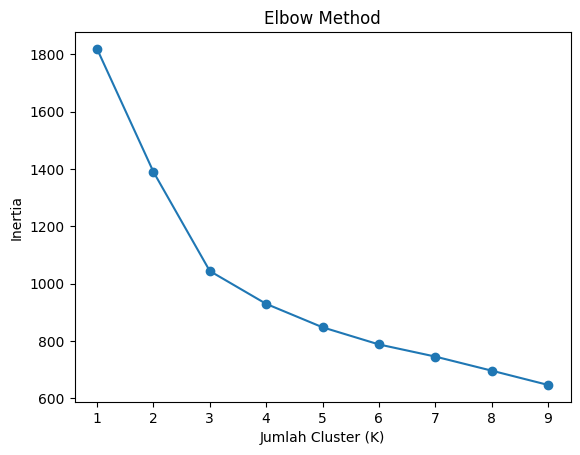

In [17]:
#Data Standardization
scaler = MinMaxScaler()
df_scaled_combine = scaler.fit_transform(df_combine_cluster)
inertia = []
K_range = range(1, 10)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled_combine)
    inertia.append(kmeans.inertia_)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [18]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=20, algorithm='elkan', init='k-means++')
kmeans.fit(df_scaled_combine)
labels_combine = kmeans.labels_
df_combine_cluster['Cluster'] = labels_combine
df_combine_cluster.head()


,FAVC,FCVC,NCP,FAF,TUE,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Cluster
0,0,2.0,3.0,0.0,1.0,0,1,0,0,0,1,0,1
1,0,3.0,3.0,3.0,0.0,0,1,0,0,0,1,0,1
2,0,2.0,3.0,2.0,1.0,0,1,0,0,0,1,0,1
3,0,3.0,3.0,2.0,0.0,0,1,0,0,0,0,1,2
4,0,2.0,1.0,0.0,0.0,0,1,0,0,0,1,0,1


In [19]:
#Silhouette Score
score = silhouette_score(df_scaled_combine, labels_combine)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.37233399989663896


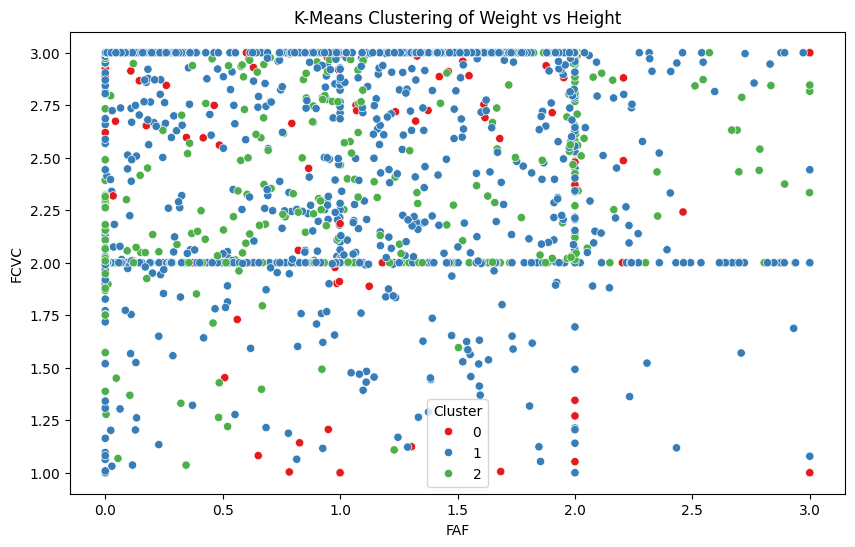

In [20]:
#Visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_combine_cluster, x='FAF', y='FCVC', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering of Weight vs Height')
plt.show()